In [1]:
#as always, let's start by loading some required python modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

# Loading the dataset into the repository
Total_data=pd.read_csv("../project_data/Bio165_InfluenzaAIGG_Assay.csv")

In [2]:
# Now, we isolate the data for 2 other Influenza strains for analysis:

Total_data3=pd.read_csv("../project_data/TotalLuminexData.csv")

Total_data4=Total_data3[Total_data3['antibody'] == 'A/Brisbane/02/2018(H1N1)2019']
Total_data5 = Total_data4[Total_data4['IgType'] == 'IgG']
transformed_Brisbane_all_Strain_data =Total_data5[Total_data5['dilution']==10]

display(transformed_Brisbane_all_Strain_data)

,Unnamed: 0,antibody,Species,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
1262,1263,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_43,IgG,10,2.392317,3.044394,2.087463,4.658211
1266,1267,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_44,IgG,10,1.700440,2.643856,1.700440,5.257388
1270,1271,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_46,IgG,10,6.082149,5.761551,4.599913,6.703904
1274,1275,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_54,IgG,10,8.476746,8.553629,9.939212,10.298349
1278,1279,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_43,IgG,10,3.285402,5.546894,3.614710,8.043027
1282,1283,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_44,IgG,10,1.700440,5.499846,3.209453,12.214699
1286,1287,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_46,IgG,10,8.543998,12.562064,5.734710,13.363621
1290,1291,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_54,IgG,10,9.097374,11.595840,13.282545,14.147861
1294,1295,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,10,donor_43,IgG,10,2.643856,5.787903,3.044394,8.225207
1298,1299,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,10,donor_44,IgG,10,0.321928,7.594325,0.321928,12.434042


In [3]:
# Untransforming Data:
Brisbane_all_Strain_data = transformed_Brisbane_all_Strain_data.copy()
Brisbane_all_Strain_data['Ctrl'] = 2**(transformed_Brisbane_all_Strain_data['Ctrl'])  
Brisbane_all_Strain_data['Vax'] = 2**(transformed_Brisbane_all_Strain_data['Vax'])
Brisbane_all_Strain_data['IFNB'] = 2**(transformed_Brisbane_all_Strain_data['IFNB'])
Brisbane_all_Strain_data['Vax_IFNB'] = 2**(transformed_Brisbane_all_Strain_data['Vax_IFNB'])

display(Brisbane_all_Strain_data)

,Unnamed: 0,antibody,Species,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
1262,1263,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_43,IgG,10,5.25,8.250000,4.250000,25.250000
1266,1267,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_44,IgG,10,3.25,6.250000,3.250000,38.250000
1270,1271,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_46,IgG,10,67.75,54.250000,24.250000,104.250000
1274,1275,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,3,donor_54,IgG,10,356.25,375.750000,981.750000,1259.250004
1278,1279,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_43,IgG,10,9.75,46.750000,12.250000,263.750000
1282,1283,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_44,IgG,10,3.25,45.250000,9.250000,4753.250008
1286,1287,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_46,IgG,10,373.25,6047.250011,53.250000,10540.250032
1290,1291,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,7,donor_54,IgG,10,547.75,3095.249992,9964.249976,18152.249960
1294,1295,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,10,donor_43,IgG,10,6.25,55.250000,8.250000,299.250000
1298,1299,A/Brisbane/02/2018(H1N1)2019,Influenza,IIV,10,donor_44,IgG,10,1.25,193.250000,1.250000,5533.749989


In [5]:
# Now, we seperate on basis of LAIV vs. IIV:

Brisbane_LAIV_data = Brisbane_all_Strain_data[Brisbane_all_Strain_data['sti'] == 'LAIV']
Brisbane_IIV_data = Brisbane_all_Strain_data[Brisbane_all_Strain_data['sti'] == 'IIV']

In [5]:
# Now, we repeat the plotting process:
mean_Total_data2 = Brisbane_all_Strain_data.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['mean', 'sem'],"Vax": ['mean', 'sem'],"IFNB": ['mean', 'sem'], "Vax_IFNB": ['mean', 'sem']})

# Rename the columns
mean_Total_data2.columns = ['_'.join(col).strip() for col in mean_Total_data2.columns.values]

# Display the result
display(mean_Total_data2)

,sti_,day_,Ctrl_mean,Ctrl_sem,Vax_mean,Vax_sem,IFNB_mean,IFNB_sem,Vax_IFNB_mean,Vax_IFNB_sem
0,IIV,3,108.125000,84.052656,111.125000,88.902188,253.375000,242.839829,356.750001,301.329970
1,IIV,7,233.500000,135.819197,2308.625001,1438.605828,2509.749994,2484.853595,8427.375000,3864.166593
2,IIV,10,221.000000,125.953282,3159.874997,2218.058641,2411.625004,2391.898948,10105.875006,4490.469610
3,LAIV,3,189.333333,183.479922,702.249998,647.518595,182.750000,174.752921,1258.416663,1213.227247
4,LAIV,7,251.583333,242.102309,9845.749983,6844.561249,2343.250000,2316.028785,11218.083309,7020.535792
5,LAIV,10,169.416667,159.471610,11301.916649,5768.383359,2433.250000,2410.008367,11414.583299,6569.321844


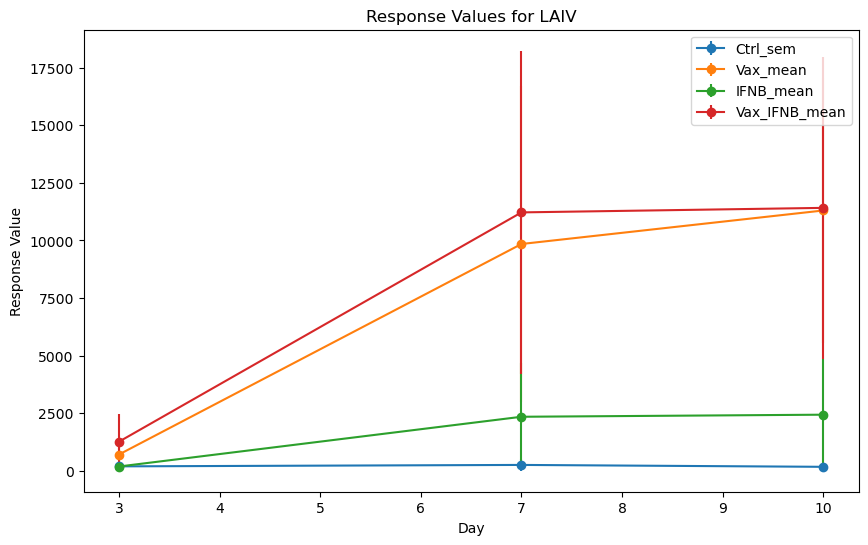

In [7]:
# Filter data for LAIV and IIV separately
Brisbane_LAIV_data = mean_Total_data2[mean_Total_data2['sti_'] == 'LAIV']
Brisbane_iiv_data = mean_Total_data2[mean_Total_data2['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(Brisbane_LAIV_data['day_'], Brisbane_LAIV_data["Ctrl_mean"], yerr=Brisbane_LAIV_data["Ctrl_mean"], label="Ctrl_sem", marker="o")
plt.errorbar(Brisbane_LAIV_data['day_'], Brisbane_LAIV_data["Vax_mean"],yerr=Brisbane_LAIV_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(Brisbane_LAIV_data['day_'], Brisbane_LAIV_data["IFNB_mean"], yerr=Brisbane_LAIV_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(Brisbane_LAIV_data['day_'], Brisbane_LAIV_data["Vax_IFNB_mean"], yerr=Brisbane_LAIV_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for LAIV')
plt.legend()
plt.show()

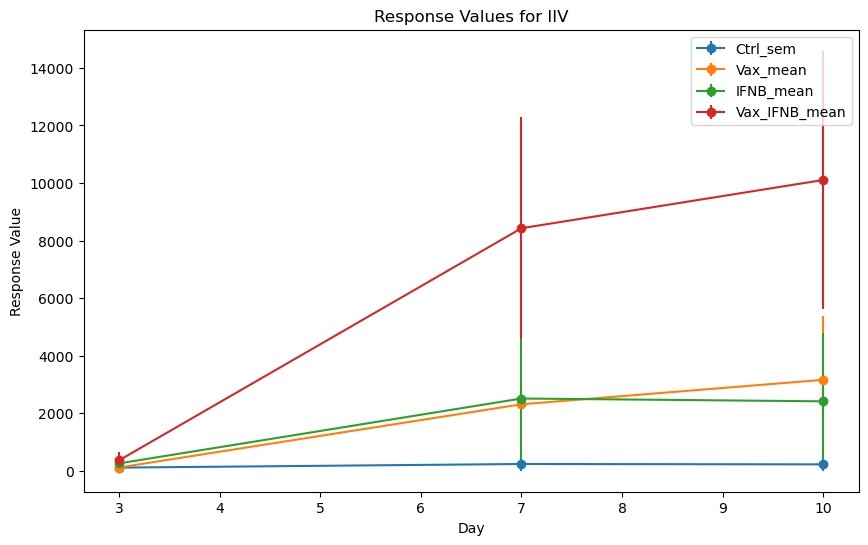

In [9]:
# Plot for IIV
plt.figure(figsize=(10, 6))

plt.errorbar(Brisbane_iiv_data['day_'], Brisbane_iiv_data["Ctrl_mean"], yerr=Brisbane_iiv_data["Ctrl_mean"], label="Ctrl_sem", marker="o")
plt.errorbar(Brisbane_iiv_data['day_'], Brisbane_iiv_data["Vax_mean"],yerr=Brisbane_iiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(Brisbane_iiv_data['day_'], Brisbane_iiv_data["IFNB_mean"], yerr=Brisbane_iiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(Brisbane_iiv_data['day_'], Brisbane_iiv_data["Vax_IFNB_mean"], yerr=Brisbane_iiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for IIV')
plt.legend()
plt.show()